In [34]:
%matplotlib inline

from metaflow import Metaflow, Flow, get_metadata, namespace
import pandas as pd
import seaborn as sns

sns.set(font_scale=1., rc={'figure.figsize':(11.7,8.27)})

# Set namespace to None to search over all namespaces
namespace(None)

In [2]:
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/home/jimmie/git/metaflow-tabular/metaflow_tabular


In [3]:
flows = list(Metaflow())
flows

[Flow('ForecastingFlow')]

In [4]:
# Set namespace to None to search over all namespaces
namespace(None)
for flow in Metaflow():
    run = flow.latest_run
    print(f"{flow.id}, last run: {run.finished_at}, successful: {run.successful}")

ForecastingFlow, last run: 2021-12-03 15:22:10.031000, successful: True


In [5]:
vars(flow)

{'_metaflow': <metaflow.client.core.Metaflow at 0x7f5838314ac0>,
 '_parent': None,
 '_path_components': ['ForecastingFlow'],
 '_attempt': None,
 '_object': {'flow_id': 'ForecastingFlow', 'ts_epoch': 1638481175966},
 '_pathspec': 'ForecastingFlow',
 'id': 'ForecastingFlow',
 '_created_at': datetime.datetime(2021, 12, 2, 15, 39, 35, 966000),
 '_tags': frozenset()}

In [6]:
from collections import OrderedDict

In [7]:
def run_to_dict(flow):
    d = OrderedDict()
    for attr in ('id', 'created_at', 'finished_at', 'successful'):
        d[attr] = getattr(flow, attr)
    for tag in sorted(list(run.tags)):
        key, val = tag.split(':')
        d['tag_%s' % key] = val
    return d

In [8]:
flow = Flow('ForecastingFlow')
runs =  list(flow.runs())

In [9]:
len(runs)

77

In [10]:
run_df = pd.DataFrame([run_to_dict(run) for run in runs])
run_df

,id,created_at,finished_at,successful,tag_date,tag_metaflow_version,tag_python_version,tag_runtime,tag_user
0,1638566495748360,2021-12-03 15:21:35.749,2021-12-03 15:22:10.031,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
1,1638566258055679,2021-12-03 15:17:38.056,2021-12-03 15:17:49.260,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
2,1638566211649092,2021-12-03 15:16:51.649,2021-12-03 15:17:02.765,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
3,1638566007926268,2021-12-03 15:13:27.927,NaT,False,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
4,1638565683523232,2021-12-03 15:08:03.524,NaT,False,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
...,...,...,...,...,...,...,...,...,...
72,1638483926306063,2021-12-02 16:25:26.306,2021-12-02 16:25:53.952,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
73,1638483264133237,2021-12-02 16:14:24.134,2021-12-02 16:14:51.297,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
74,1638481471294991,2021-12-02 15:44:31.295,2021-12-02 15:45:01.017,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
75,1638481429382957,2021-12-02 15:43:49.383,NaT,False,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie


In [11]:
# run = flow.latest_run
# run

In [12]:
run = flow.latest_successful_run
run

Run('ForecastingFlow/1638566495748360')

In [13]:
vars(run)

{'_metaflow': <metaflow.client.core.Metaflow at 0x7f57a9bc1910>,
 '_parent': Flow('ForecastingFlow'),
 '_path_components': ['ForecastingFlow', '1638566495748360'],
 '_attempt': None,
 '_object': {'run_number': '1638566495748360',
  'flow_id': 'ForecastingFlow',
  'user_name': 'jimmie',
  'tags': [],
  'system_tags': ['runtime:dev',
   'metaflow_version:2.4.3.post11+git421e9d9',
   'user:jimmie',
   'date:2021-12-03',
   'python_version:3.8.12'],
  'ts_epoch': 1638566495749},
 '_pathspec': 'ForecastingFlow/1638566495748360',
 'id': '1638566495748360',
 '_created_at': datetime.datetime(2021, 12, 3, 15, 21, 35, 749000),
 '_tags': frozenset({'date:2021-12-03',
            'metaflow_version:2.4.3.post11+git421e9d9',
            'python_version:3.8.12',
            'runtime:dev',
            'user:jimmie'})}

In [14]:
run.data

<MetaflowData: name, test_path, model_config_path, forecasts, date_col, target_col, target_index, forecast_steps, train_path, test_df>

In [15]:
run.data.name, run.data.train_path

('ForecastingFlow',
 'https://jgoode.s3.amazonaws.com/ts-datasets/seattle-trail.csv')

In [16]:
forecasts = run.data.forecasts
forecasts

,merlion-Arima,merlion-Sarima,merlion-ets,merlion-MSES,merlion-VAR,merlion-RandomForest,merlion-ExtraTrees,merlion-LGBM
0,27.308186,23.203602,27.987034,9.000000,2.112251e+01,17.23,18.76,11.691222
1,26.324369,18.641327,24.671506,-37.729558,-1.479530e+09,9.33,10.64,8.566090
2,29.697036,21.111877,24.143480,78.918495,4.809242e+08,4.78,6.04,4.711160
3,32.124913,23.372508,22.218796,59.918495,-4.769368e+15,2.42,2.88,4.171200
4,33.444328,25.696529,21.692141,34.918495,1.296853e+17,1.13,2.05,1.214129
5,33.551618,25.754337,22.910267,39.057679,-1.034308e+23,0.40,0.86,-0.031052
6,33.262583,25.611999,23.411709,10.268557,4.245118e+24,0.63,1.05,0.959697
7,32.933635,24.966983,23.358681,96.468395,-1.815380e+30,0.52,0.72,-0.076087
8,32.767229,25.820408,26.319372,103.468395,7.573097e+31,1.85,1.65,0.535694
9,32.730330,26.414087,28.457474,131.468395,-4.491779e+37,3.51,3.34,1.295170


In [17]:
run.data.test_df

,BGT North of NE 70th Total,Ped South,Ped North,Bike North,Bike South
Date,,,,,
2014-01-21 20:00:00,19.0,4.0,8.0,4.0,3.0
2014-01-21 21:00:00,9.0,1.0,1.0,5.0,2.0
2014-01-21 22:00:00,2.0,0.0,0.0,2.0,0.0
2014-01-21 23:00:00,0.0,0.0,0.0,0.0,0.0
2014-01-22 00:00:00,0.0,0.0,0.0,0.0,0.0
2014-01-22 01:00:00,0.0,0.0,0.0,0.0,0.0
2014-01-22 02:00:00,1.0,0.0,0.0,1.0,0.0
2014-01-22 03:00:00,0.0,0.0,0.0,0.0,0.0
2014-01-22 04:00:00,5.0,0.0,0.0,0.0,5.0


In [38]:
# true = run.data.test_df.iloc[:len(forecasts), [run.data.target_index] * forecasts.shape[1]]
# true

In [28]:
forecasts

,merlion-Arima,merlion-Sarima,merlion-ets,merlion-MSES,merlion-VAR,merlion-RandomForest,merlion-ExtraTrees,merlion-LGBM
0,27.308186,23.203602,27.987034,9.000000,2.112251e+01,17.23,18.76,11.691222
1,26.324369,18.641327,24.671506,-37.729558,-1.479530e+09,9.33,10.64,8.566090
2,29.697036,21.111877,24.143480,78.918495,4.809242e+08,4.78,6.04,4.711160
3,32.124913,23.372508,22.218796,59.918495,-4.769368e+15,2.42,2.88,4.171200
4,33.444328,25.696529,21.692141,34.918495,1.296853e+17,1.13,2.05,1.214129
5,33.551618,25.754337,22.910267,39.057679,-1.034308e+23,0.40,0.86,-0.031052
6,33.262583,25.611999,23.411709,10.268557,4.245118e+24,0.63,1.05,0.959697
7,32.933635,24.966983,23.358681,96.468395,-1.815380e+30,0.52,0.72,-0.076087
8,32.767229,25.820408,26.319372,103.468395,7.573097e+31,1.85,1.65,0.535694
9,32.730330,26.414087,28.457474,131.468395,-4.491779e+37,3.51,3.34,1.295170


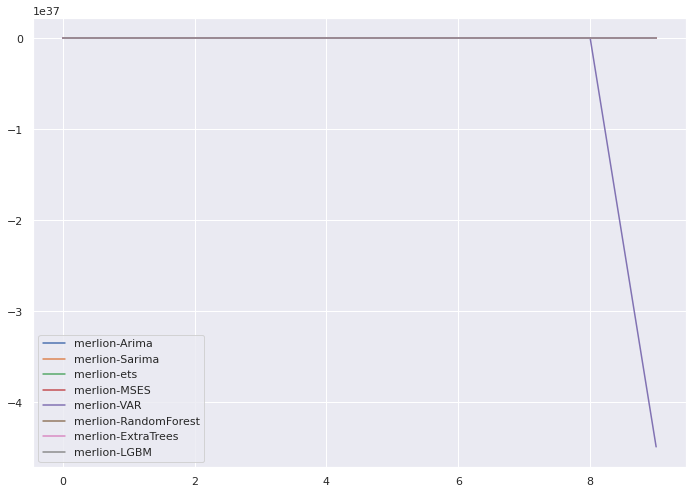

In [35]:
forecasts.plot();

/tmp/ipykernel_24947/1401642049.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ax = forecasts.drop(['merlion-VAR'], 1).plot();


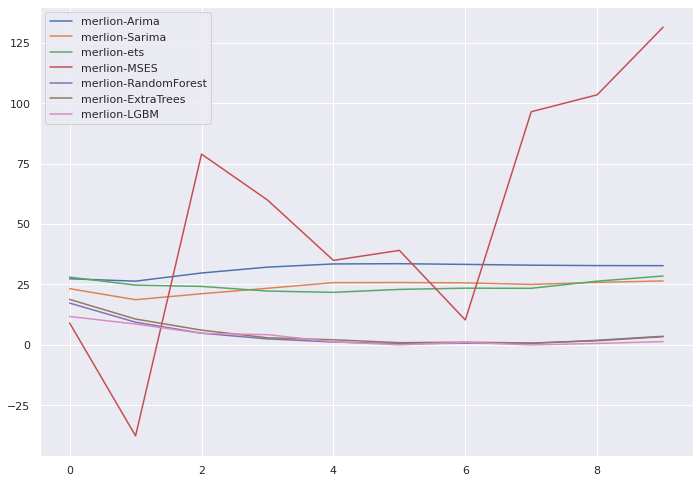

In [45]:
ax = forecasts.drop(['merlion-VAR'], 1).plot();

In [55]:
pred = forecasts.drop(['merlion-VAR'], 1)
true = run.data.test_df.iloc[:, run.data.target_index].reset_index(drop=True)
true.name = 'target'

/tmp/ipykernel_24947/3267241234.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pred = forecasts.drop(['merlion-VAR'], 1)


In [56]:
pred

,merlion-Arima,merlion-Sarima,merlion-ets,merlion-MSES,merlion-RandomForest,merlion-ExtraTrees,merlion-LGBM
0,27.308186,23.203602,27.987034,9.000000,17.23,18.76,11.691222
1,26.324369,18.641327,24.671506,-37.729558,9.33,10.64,8.566090
2,29.697036,21.111877,24.143480,78.918495,4.78,6.04,4.711160
3,32.124913,23.372508,22.218796,59.918495,2.42,2.88,4.171200
4,33.444328,25.696529,21.692141,34.918495,1.13,2.05,1.214129
5,33.551618,25.754337,22.910267,39.057679,0.40,0.86,-0.031052
6,33.262583,25.611999,23.411709,10.268557,0.63,1.05,0.959697
7,32.933635,24.966983,23.358681,96.468395,0.52,0.72,-0.076087
8,32.767229,25.820408,26.319372,103.468395,1.85,1.65,0.535694
9,32.730330,26.414087,28.457474,131.468395,3.51,3.34,1.295170


In [57]:
true

0    19.0
1     9.0
2     2.0
3     0.0
4     0.0
5     0.0
6     1.0
7     0.0
8     5.0
9     8.0
Name: target, dtype: float64

/tmp/ipykernel_24947/922994971.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  pd.concat((pred, true), 1).plot(style=['-' for _ in pred.columns] + ['-*'], linewidth=2);


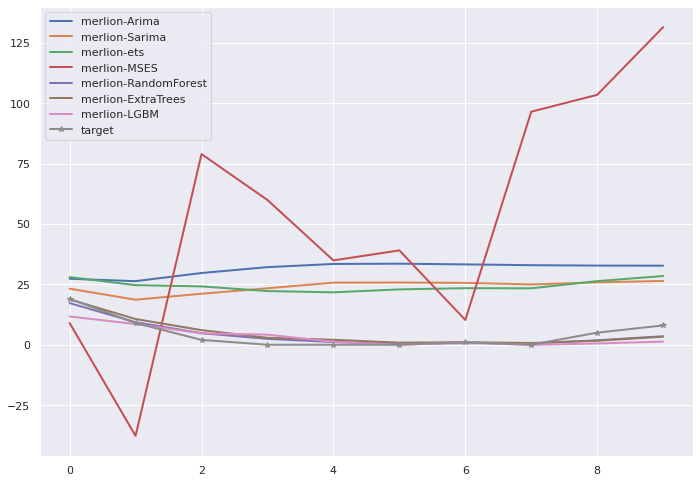

In [65]:
pd.concat((pred, true), 1).plot(style=['-' for _ in pred.columns] + ['-*'], linewidth=2);

In [21]:
steps = run.steps()
steps

<generator object MetaflowObject._filtered_children at 0x7f57a9b6cb30>

In [22]:
for s in run.steps():
    print(s)

Step('ForecastingFlow/1638566495748360/end')
Step('ForecastingFlow/1638566495748360/join')
Step('ForecastingFlow/1638566495748360/run_neuralprophet')
Step('ForecastingFlow/1638566495748360/run_kats')
Step('ForecastingFlow/1638566495748360/run_gluonts')
Step('ForecastingFlow/1638566495748360/run_merlion')
Step('ForecastingFlow/1638566495748360/start')


In [23]:
vars(s)

{'_metaflow': <metaflow.client.core.Metaflow at 0x7f57a1a79b50>,
 '_parent': Run('ForecastingFlow/1638566495748360'),
 '_path_components': None,
 '_attempt': None,
 '_object': {'run_number': '1638566495748360',
  'step_name': 'start',
  'flow_id': 'ForecastingFlow',
  'user_name': 'jimmie',
  'tags': [],
  'system_tags': ['runtime:dev',
   'metaflow_version:2.4.3.post11+git421e9d9',
   'user:jimmie',
   'date:2021-12-03',
   'python_version:3.8.12'],
  'ts_epoch': 1638566495760},
 '_pathspec': 'ForecastingFlow/1638566495748360/start',
 'id': 'start',
 '_created_at': datetime.datetime(2021, 12, 3, 15, 21, 35, 760000),
 '_tags': frozenset({'date:2021-12-03',
            'metaflow_version:2.4.3.post11+git421e9d9',
            'python_version:3.8.12',
            'runtime:dev',
            'user:jimmie'})}

In [24]:
s.created_at

datetime.datetime(2021, 12, 3, 15, 21, 35, 760000)

In [25]:
s.finished_at

datetime.datetime(2021, 12, 3, 15, 21, 37, 985000)

In [26]:
s.task

Task('ForecastingFlow/1638566495748360/start/1')

In [27]:
s.environment_info